### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

- Business problem that can be solved with KNN
- Appropriate metric to solve problem
- Build & GridSearch optimize

In [50]:
import pandas as pd 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

In [87]:
data = pd.read_csv('mushrooms', skiprows = 9, skipfooter = 1)
data.columns = ['edible?', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing',
'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


X_train, X_test, y_train, y_test = train_test_split(data.drop('edible?', axis=1), data['edible?'], test_size = 0.5, random_state = 69, stratify = data['edible?'])
data

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



,edible?,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [116]:
tot = 0
for col in data.columns:
    tot += data[col].value_counts().shape[0]
print('%s unique vals'%tot)

119 unique vals


In [122]:
print(y_train.value_counts()[0]/y_train.value_counts().sum())
print(y_test.value_counts()[0]/y_train.value_counts().sum())

0.5331590206798194
0.533396719752793


In [88]:
nscore = []
recalls = []
for n in np.arange(0,33)*2+1:
    model = model = Pipeline([
        ('tfm', make_column_transformer(
            (OneHotEncoder(drop = 'if_binary'), list(X_train.columns)),
            remainder = StandardScaler()
        )),
        ('knn', KNeighborsClassifier(n_neighbors = n))
    ])
    model.fit(X_train, y_train)
    nscore.append(model.score(X_test, y_test))
    preds = model.predict(X_test)
    recalls.append( recall_score(y_test, preds, pos_label = 'EDIBLE') )


Text(0.5, 1.0, 'Accuracy & Recall vs. Number of neighbors')

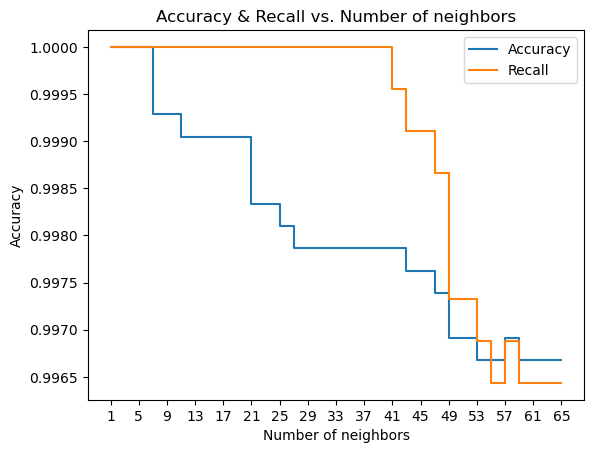

In [101]:
import matplotlib.pyplot as plt
plt.step(np.arange(0,33)*2+1, nscore, label = 'Accuracy')
plt.step(np.arange(0,33)*2+1, recalls, label = 'Recall')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.xticks(np.arange(0,17)*4+1)
plt.legend()

plt.title('Accuracy & Recall vs. Number of neighbors')

In [106]:
model = Pipeline([
    ('tfm', make_column_transformer(
        (OneHotEncoder(drop = 'if_binary'), list(X_train.columns)),
        remainder = StandardScaler()
    )),
    ('knn', KNeighborsClassifier(n_neighbors = 7))
])
model.fit(X_train, y_train)
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[2244,    0],
       [   0, 1964]])

In [109]:
model = Pipeline([
    ('tfm', make_column_transformer(
        (OneHotEncoder(drop = 'if_binary'), list(X_train.columns)),
        remainder = StandardScaler()
    )),
    ('knn', KNeighborsClassifier(n_neighbors = 65))
])
model.fit(X_train, y_train)
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[2236,    8],
       [   6, 1958]])